In [1]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf
import pandas as pd

In [21]:
# 1-2000 people in the hall
hypos = np.arange(2000)
# using uniform prior
prior = Pmf(1, hypos)
prior.normalize()
# make likelihood
from scipy.stats import binom

# two people raise their hands which born on May 11
likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)
# likelihood = [hypo for hypo in hypos]
prior *= likelihood1
prior *= likelihood2
prior *= likelihood3
prior.normalize()
prior.idxmax()

365

<AxesSubplot:>

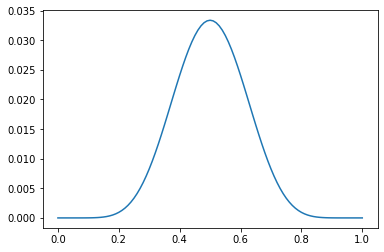

In [15]:
#
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
prior.normalize()

likelihood = {
    'H': hypos,
    'T': 1 - hypos
}

dataset = 'HHHTTTTTTTTHHHHH'

# update
for data in dataset:
    prior = prior * likelihood[data]
prior.normalize()
prior.plot(label='posterior')